夏目漱石の小説『吾輩は猫である』の文章（neko.txt）をMeCabを使って形態素解析し，その結果をneko.txt.mecabというファイルに保存せよ．このファイルを用いて，以下の問に対応するプログラムを実装せよ．

なお，問題37, 38, 39はmatplotlibもしくはGnuplotを用いるとよい．

### 30. 形態素解析結果の読み込み
形態素解析結果（neko.txt.mecab）を読み込むプログラムを実装せよ．ただし，各形態素は表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をキーとするマッピング型に格納し，1文を形態素（マッピング型）のリストとして表現せよ．第4章の残りの問題では，ここで作ったプログラムを活用せよ．

In [4]:
neko_mecab = "neko.txt.mecab"

morpheme_list = []
with open(neko_mecab, "r") as r:
    for word_data in r:
        dic_word = {}
        if word_data == "EOS\n":
            continue
        origin, status = word_data.split("\t")
        status = status.split(",")
        dic_word["surface"] = origin
        dic_word["base"] = status[6]
        dic_word["pos"] = status[0]
        dic_word["pos1"] = status[1]
        morpheme_list.append(dic_word)
print(len(morpheme_list))

202593


### 31. 動詞
動詞の表層形をすべて抽出せよ．

In [2]:
verb_surface_list = []

for morpheme in morpheme_list:
    if morpheme["pos"] == "動詞":
        verb_surface_list.append(morpheme["surface"])
print(len(verb_surface_list))

28120


### 32. 動詞の原形
動詞の原形をすべて抽出せよ．

In [3]:
verb_base_list = []

for morpheme in morpheme_list:
    if morpheme["pos"] == "動詞":
        verb_base_list.append(morpheme["base"])
print(len(verb_base_list))

28120


### 33. サ変名詞
サ変接続の名詞をすべて抽出せよ．

In [4]:
sahen_list = []

for morpheme in morpheme_list:
    if morpheme["pos"] == "名詞":
        if morpheme["pos1"] == "サ変接続":
            sahen_list.append(morpheme["surface"])
print(len(sahen_list))

4846


### 34. 「AのB」
2つの名詞が「の」で連結されている名詞句を抽出せよ．

In [5]:
noun_phrase_list = []
first = True
second = False
third = False
noun_phrase = ""

for morpheme in morpheme_list:
    if morpheme["pos"] == "名詞" and first:
        noun_phrase += morpheme["surface"]
        first = False
        second = True
        continue
    elif first:
        noun_phrase = ""
        continue
        
    if morpheme["surface"] == "の" and second:
        noun_phrase += morpheme["surface"]
        second = False
        third = True
        continue
    elif second:
        noun_phrase = ""
        first = True
        second = False
        continue
    
    if morpheme["pos"] == "名詞" and third:
        noun_phrase += morpheme["surface"]
        noun_phrase_list.append(noun_phrase)
        first = True
        third = False
        continue
    elif third:
        noun_phrase = ""
        first = True
        third = False
        continue
print(len(noun_phrase_list))
print(noun_phrase_list[:20])

4962
['彼の掌', '掌の上', '書生の顔', 'はずの顔', '顔の真中', '穴の中', '書生の掌', '何の事', '肝心の母親', '藁の上', '笹原の中', 'ようやくの思い', '池の前', 'ようやくの事', '一樹の蔭', '垣根の穴', '隣家の三毛', '時の通路', '一刻の猶予', '家の内']


### 35. 名詞の連接
名詞の連接（連続して出現する名詞）を最長一致で抽出せよ．

In [8]:
noun_seq_list = []
noun_seq = ""
head = True
body = False

for morpheme in morpheme_list:
    if morpheme["pos"] == "名詞" and head:
        noun_seq += morpheme["surface"]
        head = False
        body = True
        continue
    
    if morpheme["pos"] == "名詞" and body:
        noun_seq += morpheme["surface"]
        continue
    elif body:
        noun_seq_list.append(noun_seq)
        noun_seq = ""
        head = True
        body = False
        continue

print(len(noun_seq_list))
print(noun_seq_list[:20])

49056
['一', '吾輩は猫である', '名前', 'どこ', 'かとん', '見当', '何', 'した所', 'いた事', '記憶', '吾輩', 'ここ', '人間', 'もの', 'あと', 'それ', '書生', '人間中', '一番獰悪', '種族']


### 36. 単語の出現頻度
文章中に出現する単語とその出現頻度を求め，出現頻度の高い順に並べよ．



In [9]:
word_freq = {}

for morpheme in morpheme_list:
    if morpheme["surface"] in word_freq.keys():
        word_freq[morpheme["surface"]] += 1
    else:
        word_freq[morpheme["surface"]] = 1
"""
sum_appear = sum(word_freq.values())

for key_word in word_freq.keys():
    word_freq[key_word] = word_freq[key_word] / sum_appear
"""

word_freq_sorted = sorted(word_freq.items(), key=lambda x:-x[1])
print(word_freq_sorted[:10])

[('の', 9109), ('。', 7484), ('、', 6772), ('て', 6697), ('は', 6384), ('に', 6147), ('を', 6068), ('と', 5476), ('が', 5259), ('た', 3916)]


### 37. 頻度上位10語
出現頻度が高い10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．



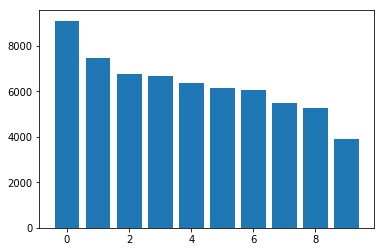

In [11]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(10)
y = [word_freq_sorted[i][1] for i in range(10)]

plt.bar(x, y)
plt.show()

### 38. ヒストグラム
単語の出現頻度のヒストグラム（横軸に出現頻度，縦軸に出現頻度をとる単語の種類数を棒グラフで表したもの）を描け．


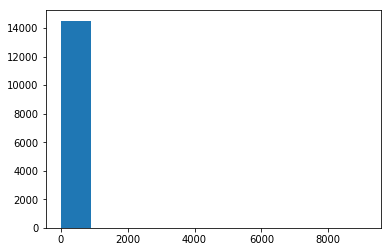

In [12]:
x = [wfs[1] for wfs in word_freq_sorted]
plt.hist(x)
plt.show()

### 39. Zipfの法則
単語の出現頻度順位を横軸，その出現頻度を縦軸として，両対数グラフをプロットせよ．

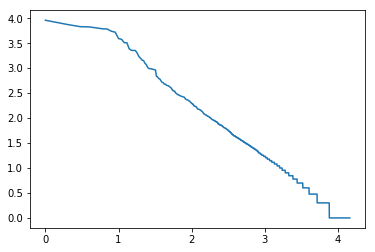

In [13]:
x = np.log10(np.arange(len(word_freq_sorted)) + 1)
y = np.log10(np.array([wfs[1] for wfs in word_freq_sorted]))

plt.plot(x, y)
plt.show()